In [ ]:
# Nama: Gabril Hozanna
# Kelas: 3B TKJ
# NIM: 42517042

import pandas as pd
from scipy.stats import pearsonr
from matplotlib import pyplot as plt
import numpy as np 
from sklearn import linear_model

In [ ]:
df = pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [ ]:
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


In [ ]:
len(df)

55

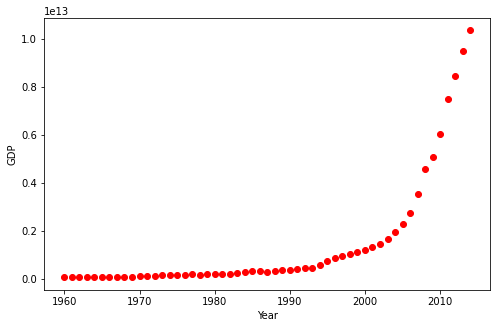

In [ ]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data,y_data,'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [ ]:
#hasil visualisasi dari dataset bentuknya eksponensial
#buat module/fungsi
def sigmoid(x, beta_1, beta_2):
    y = 1 / (1+np.exp(-beta_1*(x-beta_2)))
    return y

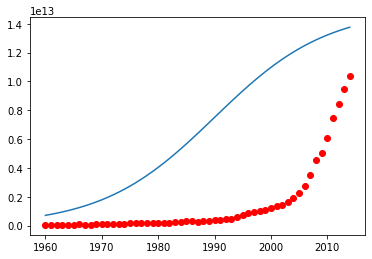

In [ ]:
#testing model
beta_1 = 0.1
beta_2 = 1990.0

#logistic function
y_pred = sigmoid(x_data, beta_1, beta_2)

#plot initial prediction against datapoint
plt.plot(x_data,y_pred*15000000000000)
plt.plot(x_data,y_data,'ro')
plt.show()

In [ ]:
#normalisasi data
x_norm = x_data/max(x_data)
y_norm = y_data/max(y_data)

In [ ]:
#menentukan nilai parameter
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, x_norm, y_norm)
print("beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

beta_1 = 690.453017, beta_2 = 0.997207


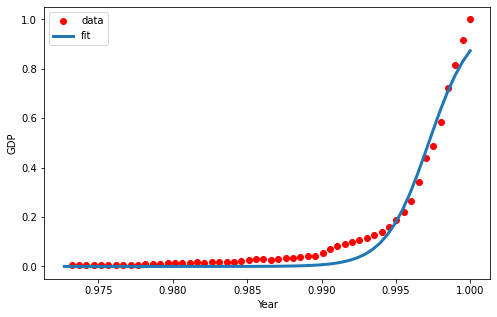

In [ ]:
x = np.linspace(1960,2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(x_norm,y_norm,'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_norm, y)

0.030498423714796833

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_norm, y)

0.0015679275027813092

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_norm, y)

0.9726049828239046

In [ ]:
#Membuat fungsi hitung MAE
#x disini adalah y atau nilai dari y asli
#y disini adalah y hasil prediksi
def mae(x,y):
    summation = 0 #variabel sigma
    n = len(y)
    
    for i in range (0,n):
        difference = x[i]-y[i]
        absolute = abs(difference)
        summation = summation + absolute
    
    summation = summation/n
    return summation


In [ ]:
#Membuat fungsi hitung MSE
#x disini adalah y atau nilai dari y asli
#y disini adalah y hasil prediksi
def mse(x,y): 
    summation = 0 #variabel untuk menyimpan penjumlahan perbedaan (sigma)
    n = len(y) #banyaknya jumlah n atau item pada list
    
    for i in range (0,n):
        difference = x[i] - y [i] 
        squared_difference = difference**2 #pangkat duakan dari kedua variabel
        summation = summation + squared_difference #jumlah dari hasil perhitungan variabel
    
    summation = summation/n #banyaknya hasil perhitungan dibagi total nilai n
    return summation

In [ ]:
#Membuat fungsi hitung R2
#x disini adalah y atau nilai dari y asli
#y disini adalah y hasil prediksi
def r2(x,y):
    summation = 0
    n = len(y)
    
    for i in range(0,n):
        difference_1 = x[i] - y[i]
        squared_difference_1 = difference_1**2
        summation_1 = summation + squared_difference_1 #cari niali sigma pertama
#         n_y = summation + y[i] 
#         avg = n_y/n
        avg = y[i]/n
        difference_2 = x[i] - avg
        squared_difference_2 = difference_2**2
        summation_2 = summation + squared_difference_2 #cari nilai sigma kedua
#         rse = 1 - summation_1/summation_2 #opsi 1
        rse = summation_1/summation_2 #opsi 2
    
#     summation = rse #opsi 1
    summation = 1- rse #opsi 2
    return summation 

In [ ]:
n_mse = mse(y_norm, y)
print ("Nilai MSE adalah: ", n_mse)

Nilai MSE adalah:  0.0015679275027813092


In [ ]:
n_mae = mae(y_norm,y)
print ("Nilai MAE adalah: ", n_mae)

Nilai MAE adalah:  0.030498423714796833


In [ ]:
n_r2 = r2(y_norm, y)
print ("Nilai R2 adalah: ", n_r2)

Nilai R2 adalah:  0.983363863008388


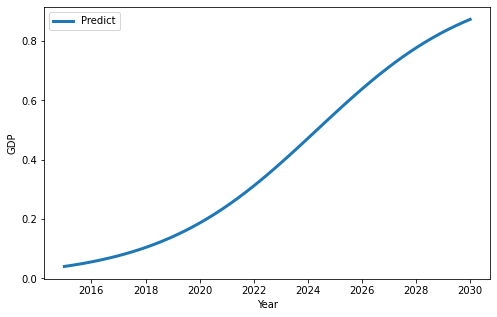

Data 
 [0.04017434 0.04397999 0.04812807 0.05264583 0.05756204 0.06290684
 0.06871175 0.07500944 0.08183361 0.08921875 0.09719982 0.10581188
 0.11508972 0.12506727 0.1357771  0.14724969 0.15951274 0.17259036
 0.18650224 0.20126274 0.21687999 0.23335505 0.25068099 0.26884223
 0.28781383 0.30756106 0.32803909 0.34919301 0.37095799 0.39325981
 0.4160157  0.43913532 0.46252218 0.48607513 0.50969008 0.53326186
 0.55668607 0.57986089 0.60268887 0.62507848 0.64694549 0.66821407
 0.68881769 0.70869961 0.7278132  0.74612192 0.76359912 0.78022757
 0.79599885 0.81091263 0.82497586 0.83820184 0.85060936 0.8622218
 0.87306629]


0.2654521327044867

In [ ]:
#Prediksi Tahun 2015-2030
x = np.linspace(2015,2030, 55)
x2 = x
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
# plt.plot(x_norm,y_norm,'ro', label='data')
plt.plot(x2,y, linewidth=3.0, label='Predict')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()
print("Data \n", y)
# print("Data Asli", y_norm)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_norm, y)